In [1]:
#AI model to predict whether a startup will get funded
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load your cleaned CSV file
df = pd.read_csv("shark_tank_cleaned.csv")

# Strip column names
df.columns = df.columns.str.strip()

# Replace missing values if any
df.fillna(0, inplace=True)

# Create a binary target variable
# "Funded" if Investment > 0
df['Funded'] = df['Investment Amount (In Lakhs INR)'].apply(lambda x: 1 if x > 0 else 0)


In [3]:
# Encode Sector/Idea
le = LabelEncoder()
df['Idea_encoded'] = le.fit_transform(df['Idea'])

# Optionally encode season if available
if 'Season' in df.columns:
    df['Season_encoded'] = le.fit_transform(df['Season'])
else:
    df['Season_encoded'] = 0  # if not available


In [4]:
features = ['Idea_encoded', 'Season_encoded']  # Add more if available
X = df[features]
y = df['Funded']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.4166666666666667

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.54      0.50        13
           1       0.33      0.27      0.30        11

    accuracy                           0.42        24
   macro avg       0.40      0.41      0.40        24
weighted avg       0.41      0.42      0.41        24



In [8]:
# Example: Predict for a new pitch
# Let's say: Idea_encoded = 5, Season_encoded = 1
new_pitch = pd.DataFrame([[5, 1]], columns=features)
prediction = model.predict(new_pitch)

print("🔮 Prediction for new pitch:", "Funded" if prediction[0] == 1 else "Not Funded")


🔮 Prediction for new pitch: Funded


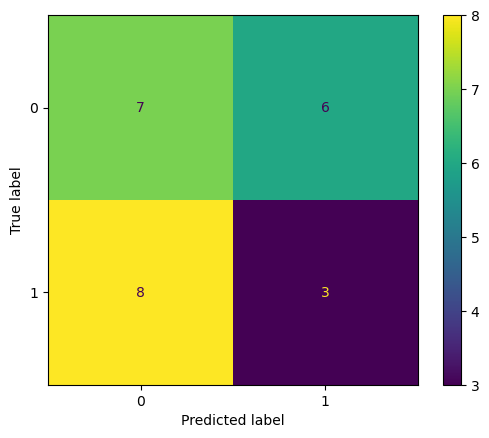

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


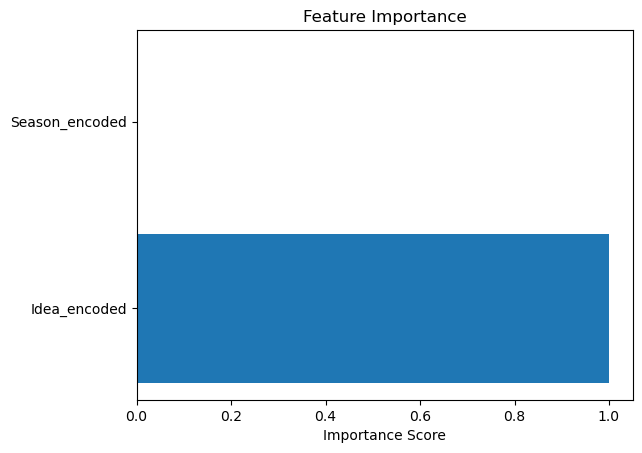

In [10]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
plt.barh(X.columns, importance)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()


In [11]:
import joblib
joblib.dump(model, "shark_funding_predictor.pkl")


['shark_funding_predictor.pkl']